# modélisation

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib as plt
from matplotlib import pyplot
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
scaled_df=pd.read_csv("C:/Users/Imen/Desktop/projet immobilier/scaled_df.csv")
train_df=pd.read_csv("C:/Users/Imen/Desktop/projet immobilier/train_df.csv")
test_df=pd.read_csv("C:/Users/Imen/Desktop/projet immobilier/test_df.csv")
test_scaled_df=pd.read_csv("C:/Users/Imen/Desktop/projet immobilier/test_scaled_df.csv")

In [3]:
scaled_df

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,0.825666,-0.515089,-0.608996,-0.726655,-0.621558,0.408724,0.111969,0.0
1,1.223223,-0.394578,-0.485628,-0.608980,-0.496636,0.103359,-0.482785,0.0
2,-0.605540,0.576784,0.109859,0.139866,0.224271,2.008902,1.137529,1.0
3,-0.048960,-0.809772,-0.824890,-1.029403,-0.879211,-1.631203,-1.084516,0.0
4,1.859314,-0.381845,-0.485628,-0.526607,-0.486226,-0.615347,-0.562144,0.0
...,...,...,...,...,...,...,...,...
11553,-0.764563,-0.473251,-0.573409,-0.209952,-0.566905,0.013734,-0.917950,0.0
11554,-1.957235,-0.220406,0.102742,-0.336186,-0.153099,-0.380402,-0.761849,1.0
11555,-0.207983,0.159316,0.005471,0.570988,0.047297,0.667409,0.060517,1.0
11556,1.064200,-0.179478,-0.037233,-0.040926,-0.043792,-1.213967,-1.230153,1.0


# 1 er essai de régression linéaire

In [4]:
#définir x_train,y_train, x_test,y_test
X_train=scaled_df.drop(['median_house_value','ocean_proximity'], axis=1)
Y_train=scaled_df['median_house_value']
X_test=test_scaled_df.drop(['median_house_value'], axis=1)
Y_test=test_scaled_df['median_house_value']

In [5]:
X_train

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,0.825666,-0.515089,-0.608996,-0.726655,-0.621558,0.408724
1,1.223223,-0.394578,-0.485628,-0.608980,-0.496636,0.103359
2,-0.605540,0.576784,0.109859,0.139866,0.224271,2.008902
3,-0.048960,-0.809772,-0.824890,-1.029403,-0.879211,-1.631203
4,1.859314,-0.381845,-0.485628,-0.526607,-0.486226,-0.615347
...,...,...,...,...,...,...
11553,-0.764563,-0.473251,-0.573409,-0.209952,-0.566905,0.013734
11554,-1.957235,-0.220406,0.102742,-0.336186,-0.153099,-0.380402
11555,-0.207983,0.159316,0.005471,0.570988,0.047297,0.667409
11556,1.064200,-0.179478,-0.037233,-0.040926,-0.043792,-1.213967


In [6]:
X_test

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-1.945885,0.643383,0.095121,0.637892,0.206080,1.554603
1,-0.678598,-0.548359,-0.646003,-0.584371,-0.613430,-0.293435
2,0.826305,0.109894,-0.048398,-0.051837,-0.029174,0.237244
3,-0.916215,1.124999,0.692725,1.897582,0.818773,1.069899
4,-0.995420,-0.245169,-0.206034,-0.466743,-0.230819,0.872803
...,...,...,...,...,...,...
4949,-0.282571,2.444636,1.709123,2.367025,1.891633,1.171267
4950,0.430278,-0.283179,-0.297792,0.108565,-0.202382,-0.967413
4951,-0.520187,-0.057352,-0.130745,-0.123483,-0.098974,-0.895099
4952,1.697565,-0.836792,-0.808344,-0.848500,-0.861609,-0.872218


In [7]:
#on test sur la partie train avant la standardisation
from sklearn import linear_model
#Initialize the linear regression model
reg = linear_model.LinearRegression()
#Train our model with the training data
reg.fit(X_train, Y_train)
#Print the coefecients/weights for each feature/column of our model
print(reg.coef_)
#print our price predictions on our test data
y_pred = reg.predict(X_test)
print(y_pred)
reg.score(X_test,Y_test)

[ 0.1965773  -0.47052163  0.32513    -0.27066942  0.46378848  0.79669987]
[ 0.50715547 -0.44552729  0.28450164 ... -0.84338588 -0.40022281
  0.14724762]


0.5488558470133748

In [8]:
#MSE
from sklearn.metrics import mean_squared_error
mean_squared_error(y_pred, Y_test)

0.4474438829879897

In [9]:
#on à utilisé une regression linéaire simple sur la partie entrainement et on à eu 0.63contre la prediction avec les valeur standardiser
#ou on à eu une prédiction plus bas sachant qu on a pris la mediane comme y et les rest de la data comme un x

In [10]:
from sklearn import linear_model
#definir x et y
x=train_df.drop('median_house_value',axis=1)
y=train_df['median_house_value']
#instancier modèle
#Initialize the linear regression model
reg = linear_model.LinearRegression()
#Train our model with the training data
reg.fit(x,y)
#Print the coefecients/weights for each feature/column of our model
print(reg.coef_)
#print our price predictions on our test data
y_pred = reg.predict(x)
print(y_pred)
reg.score(x,y)

[-4.22624767e+04 -4.18030331e+04  1.03474909e+03 -1.34450083e+01
  9.75074101e+01 -3.61018781e+01  6.63056262e+01  4.12196677e+04
  3.40143936e+02]
[245515.05018051 250539.52475958 393284.41658961 ... 254171.92314082
  92758.72553764 225359.65996522]


0.6340406798371199

In [11]:
from sklearn.linear_model import LinearRegression
#on va changer le X
x=scaled_df[['median_income']]
y=scaled_df[['median_house_value']]
#instancier modèle
model_linReg = LinearRegression()
#entrainement du modèle
model_linReg.fit(x, y)
#précision du modèle
precision = model_linReg.score(x, y)
print(precision)
#prédiction
prediction = model_linReg.predict(x)
print(prediction)

0.472730657568075
[[ 0.28101972]
 [ 0.07106486]
 [ 1.38122868]
 ...
 [ 0.45887981]
 [-0.8346681 ]
 [-0.13753285]]


In [12]:
from sklearn.linear_model import LinearRegression
#on va changer le X
x=train_df[['median_income']]
y=train_df[['median_house_value']]
#instancier modèle
model_linReg = LinearRegression()
#entrainement du modèle
model_linReg.fit(x, y)
#précision du modèle
precision = model_linReg.score(x, y)
print(precision)
#prédiction
prediction = model_linReg.predict(x)
print(prediction)

0.47273065756807486
[[238384.85583935]
 [214309.51170178]
 [364544.87460352]
 ...
 [258779.91938285]
 [110449.89032009]
 [190389.79085791]]


In [13]:
#on va  tester une régression linéaire simple sur la partie test 

# 2 eme essai de modéle

In [14]:
#random forest
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 1000, random_state = 42)
regressor.fit(X_test, Y_test)

RandomForestRegressor(n_estimators=1000, random_state=42)

In [15]:
y_pred = regressor.predict(X_test)
y_pred

array([ 0.7312602 , -0.71315436,  0.31477254, ..., -1.14062489,
       -1.01394638, -0.18138093])

In [16]:
df=pd.DataFrame({'Actual':Y_test, 'Predicted':y_pred})
df

,Actual,Predicted
0,0.687440,0.731260
1,-0.855528,-0.713154
2,0.384047,0.314773
3,0.237552,0.401927
4,0.148268,0.264040
...,...,...
4949,0.501937,0.681792
4950,-1.223066,-1.171192
4951,-1.154586,-1.140625
4952,-1.281144,-1.013946


In [17]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))

Mean Absolute Error: 0.15893299537811623
Mean Squared Error: 0.048593891022028775
Root Mean Squared Error: 0.2204402209716475


In [18]:
# Calculate the absolute errors
errors = abs(y_pred - Y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / Y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')


Mean Absolute Error: 0.16 degrees.
Accuracy: 93.32 %.


C:\Users\Imen\anaconda31\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Imen\anaconda31\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


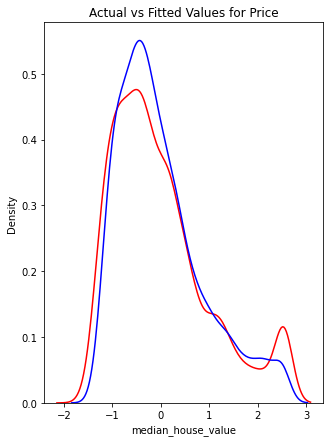

In [19]:
import seaborn as sns
plt.figure(figsize=(5, 7))


ax = sns.distplot(Y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Fitted Values" , ax=ax)


plt.title('Actual vs Fitted Values for Price')


plt.show()
plt.close()

# 3eme modéle

In [21]:
train_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-118.02,34.11,39.0,1504.0,280.0,718.0,261.0,4.6250,219000.0,1
1,-122.33,37.94,44.0,1769.0,332.0,828.0,309.0,4.0526,150800.0,3
2,-121.70,36.55,21.0,3905.0,583.0,1528.0,586.0,7.6245,336600.0,0
3,-122.19,37.75,28.0,856.0,189.0,435.0,162.0,0.8012,81800.0,3
4,-117.38,33.99,52.0,1797.0,332.0,905.0,313.0,2.7054,141700.0,1
...,...,...,...,...,...,...,...,...,...,...
11553,-116.21,33.66,19.0,1596.0,295.0,1201.0,282.0,3.8846,100900.0,1
11554,-117.57,34.07,4.0,2152.0,580.0,1083.0,441.0,3.1458,118800.0,1
11555,-121.81,37.37,26.0,2987.0,539.0,1931.0,518.0,5.1099,213100.0,0
11556,-119.61,36.57,42.0,2242.0,521.0,1359.0,483.0,1.5833,65100.0,1


In [46]:
###utiliser un modél KNN
X=train_df.drop('median_house_value',axis=1)
Y=train_df['median_house_value']
## faire un split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
##feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print(y_pred)

C:\Users\Imen\anaconda31\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[171100. 125700. 180700. ...  52500. 175400. 116300.]


In [47]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0 59]]
              precision    recall  f1-score   support

     22500.0       0.00      0.00      0.00         0
     26600.0       0.00      0.00      0.00         0
     26900.0       0.00      0.00      0.00         0
     27500.0       0.00      0.00      0.00         0
     30000.0       0.00      0.00      0.00         1
     32500.0       0.00      0.00      0.00         0
     32900.0       0.00      0.00      0.00         1
     34200.0       0.00      0.00      0.00         1
     37500.0       0.00      0.00      0.00         0
     38800.0       0.00      0.00      0.00         0
     39400.0       0.00      0.00      0.00         1
     39600.0       0.00      0.00      0.00         0
     40000.0       0.00      0.00      0.00         0
     40900.0       0.00      0.00      0.00         0
     41700.0       0.00      0.00

C:\Users\Imen\anaconda31\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Imen\anaconda31\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Imen\anaconda31\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Imen\anaconda31\lib\site-packages\sklearn\metrics\_cla